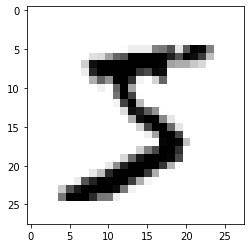

In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist_data = tf.keras.datasets.mnist
(x, y), (x_test, y_test) = mnist_data.load_data()
# x_train=np.reshape(x_train,(60000,784))
# x_train = x_train.T
# y_new = np.eye(10)[y_train.astype('int32')]
# print(y_train.shape)
# y_new = y_new.T.reshape(10,60000)
# y_train = y_new
# print(x_train.shape)
# print(y_new[:,0])

x=np.reshape(x,(60000,784))
x = x.T
i = np.arange(y.shape[0])
y_ = np.zeros((10,60000))
y_[y.astype(int),i] = 1
plt.imshow(x[:,0].reshape(28,28), cmap = plt.cm.binary)

In [68]:
x = x/255.0
#separating train and test
x_train = x[:,:-10000]
x_test = x[:,-10000:]
y_test = y_[:,-10000:]
y_train = y_[:,:-10000]

In [69]:
def loss(y, h):

    L_sum = np.sum(y*np.log(h)) + np.sum((1-y)*(np.log(1-h)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

In [70]:
def sig(z):
    h= 1/(1+np.exp(-z))
    return h

In [71]:
n_x = x_train.shape[0]
n_l2 = 256
n_l3 = 128
n_l4 = 64
learning_rate = 1
m = y_train.shape[1]
W1 = np.random.randn(n_l2, n_x)
W2 = np.random.randn(n_l3,n_l2)
W3 = np.random.randn(n_l4, n_l3)
W4 = np.random.randn(10,n_l4)
b1 = np.random.randn(n_l2, 1)
b2 = np.random.randn(n_l3, 1)
b3 = np.random.randn(n_l4,1)
b4 = np.random.randn(10,1)
X = x_train
Y = y_train 

In [72]:
#batch descent with sigmoid 3 layers
for i in range(1000):

    Z2 = np.dot(W1,X) + b1
    A2 = sig(Z2)
    Z3 = np.dot(W2,A2) + b2
    A3 = sig(Z3)
    Z4 = np.dot(W3,A3) + b3
    A4 = sig(Z4)
    Z5 = np.dot(W4,A4) + b4
    A5 = sig(Z5)
        
    cost= loss(Y, A5)
        
    dZ5 = A5-Y
    dW4 = (1./m) * np.dot(dZ5, A4.T)
    db4 = (1./m) * np.sum(dZ5, axis=1, keepdims=True)
        
    dA4 = np.dot(W4.T, dZ5)
    dZ4 = dA4 * A4 * (1-A4)
    dW3 = (1./m) * np.dot(dZ4, A3.T)
    db3 = (1./m) * np.sum(dZ4, axis=1, keepdims=True)
    
    dA3 = np.dot(W3.T,dZ4)
    dZ3 = dA3 * A3 * (1-A3)
    dW2 = (1./m) * np.dot(dZ3, A2.T)
    db2 = (1./m) * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W2.T,dZ3)
    dZ2 = dA2 * A2 * (1-A2)
    dW1 = (1./m) * np.dot(dZ2, X.T)
    db1 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    
    W4 = W4 - (learning_rate * dW4)
    b4 = b4 - (learning_rate * db4)
    W3 = W3 - (learning_rate * dW3)
    b3 = b3 - (learning_rate * db3)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)


Epoch 0 cost:  27.93604948029666
Epoch 100 cost:  1.5293208821553508
Epoch 200 cost:  1.0333667092667573
Epoch 300 cost:  0.8429283863515955
Epoch 400 cost:  0.7292854469274579
Epoch 500 cost:  0.6498183299434733
Epoch 600 cost:  0.5893912431831881
Epoch 700 cost:  0.540986784018361
Epoch 800 cost:  0.5010574448903778
Epoch 900 cost:  0.4673361643619872
Final cost: 0.43852604282039687


In [73]:
Z2 = np.matmul(W1, x_test) + b1
A2 = sig(Z2)
Z3 = np.dot(W2,A2) + b2
A3 = sig(Z3)
Z4 = np.dot(W3,A3) + b3
A4 = sig(Z4)
Z5 = np.dot(W4,A4) + b4
A5 = sig(Z5)

prediction = np.argmax(A5, axis=0)
labels = np.argmax(y_test, axis=0)

diff=prediction-labels 
accuracy = 1.0 - (float(np.count_nonzero(diff)) / len(diff))
print(accuracy*100)

91.53
